### Audio Feature Extraction

In [2]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import soundfile as sf

##Return audio features
def feature_extraction(file_name):
    X , sample_rate = librosa.load(file_name, sr=None) #Can also load file using librosa
    if X.ndim > 1: # ndim id number of array dimensions
        X = X[:,0]
    X = X.T

    ## stFourier Transform
    stft = np.abs(librosa.stft(X))

    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=20).T, axis=0) #Returns N_mel coefs
    rmse = np.mean(librosa.feature.rms(y=X).T, axis=0) #RMS Energy for each Frame (Stanford's). Returns 1 value
    spectral_flux = np.mean(librosa.onset.onset_strength(y=X, sr=sample_rate).T, axis=0) #Spectral Flux (Stanford's). Returns 1 Value
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=X).T, axis=0) #Returns 1 value

    #mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0) #Returns 128 values
    #chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0) #Returns 12 values
    #contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0) #Returns 7 values
    #tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T, axis=0) #tonal centroid features Returns 6 values

    ##Return computed audio features
    return mfccs, rmse, spectral_flux, zcr

# Audio parsing: Function makes call for feature extraction and returns array with features and labels
def parse_audio_files(parent_dir, sub_dirs, file_ext='*.mp3'): # Audio Format

    n_mfccs = 20 # This variable is tunneable with each run
    number_of_features = 3 + n_mfccs
    #number_of_features = 154 + n_mfccs # 154 are the total values returned by rest of computed features
    features, labels = np.empty((0,number_of_features)), np.empty(0)

    ##Extract features for each audio file
    for label, sub_dir in enumerate(sub_dirs): ##The enumerate() function adds a counter to an iterable.
        for file_name in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)): #parent is data, sub_dirs are the classes
            print("Actual File Name: ", file_name)
            try:
                mfccs, rmse, spectral_flux, zcr = feature_extraction(file_name)
                #mfccs, zcr, mel, chroma, contrast, tonnetz = feature_extraction(file_name)
            except Exception as e:#if an exception ids found
                print("[Error] there was an error in feature extraction. %s" % (e))
                continue

            extracted_features = np.hstack([mfccs, rmse, spectral_flux, zcr])
            #print "Total Extracted Features: ", len(extracted_features) #This helps us identify really how many features are being computed
            features = np.vstack([features, extracted_features]) #Stack arrays in sequence vertically (row wise).
            labels = np.append(labels, label)
        print("Extracted features from %s, done" % (sub_dir))
    return np.array(features), np.array(labels, dtype = np.int) ## arrays with features and corresponding labels for each audio


# Audio parsing: Function makes call for feature extraction and returns array with features and labels
def audio_data_2d_predict(path, file_ext='*.mp3'): # Audio Format

    file_name = path

    n_mfccs = 20 # This variable is tunneable with each run
    number_of_features = 3 + n_mfccs
    #number_of_features = 154 + n_mfccs # 154 are the total values returned by rest of computed features
    features, labels = np.empty((0,number_of_features)), np.empty(0)

    ##Extract features for each audio file

    mfccs, rmse, spectral_flux, zcr = feature_extraction(file_name)

    extracted_features = np.hstack([mfccs, rmse, spectral_flux, zcr])
            #print "Total Extracted Features: ", len(extracted_features) #This helps us identify really how many features are being computed
    features = np.vstack([features, extracted_features]) #Stack arrays in sequence vertically (row wise).

    return np.array(features)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Read audio classes directories
import os
audio_subdirectories = os.listdir(r'/content/drive/MyDrive/audio files')
audio_subdirectories.sort()
print('Audio Subdirs: ', audio_subdirectories)

Audio Subdirs:  ['001 - Low', '002 - Intermediate', '003 - High']


In [5]:
import os
os.getcwd()

'/content'

In [6]:
##Get features and labels
#NumPy array files are created. Files are binary files to store numpy arrays

# Parse Audio Files Function Call
features, labels = parse_audio_files(r'/content/drive/MyDrive/audio files', audio_subdirectories) #(parent dir,sub dirs)
np.save('feat.npy', features)
np.save('label.npy', labels)

Actual File Name:  /content/drive/MyDrive/audio files/001 - Low/Avalinguo - Dana and Konay segment 108 - D.mp3
Actual File Name:  /content/drive/MyDrive/audio files/001 - Low/Avalinguo - Dana and Konay segment 113 - D.mp3
Actual File Name:  /content/drive/MyDrive/audio files/001 - Low/Avalinguo - Dana and Konay segment 103 - D.mp3
Actual File Name:  /content/drive/MyDrive/audio files/001 - Low/Avalinguo - Dana and Konay segment 114 - D.mp3
Actual File Name:  /content/drive/MyDrive/audio files/001 - Low/Avalinguo - Dana and Konay segment 110 - D.mp3
Actual File Name:  /content/drive/MyDrive/audio files/001 - Low/Avalinguo - Dana and Konay segment 102 - D.mp3
Actual File Name:  /content/drive/MyDrive/audio files/001 - Low/Avalinguo - Dana and Konay segment 11 - D.mp3
Actual File Name:  /content/drive/MyDrive/audio files/001 - Low/Avalinguo - Dana and Konay segment 104 - D.mp3
Actual File Name:  /content/drive/MyDrive/audio files/001 - Low/Avalinguo - Dana and Konay segment 1 - D.mp3
Actu

<ipython-input-2-6a5edca173bb>:56: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(features), np.array(labels, dtype = np.int) ## arrays with features and corresponding labels for each audio


features

In [8]:
len(features)

1424

### Data Exploration

In [9]:
# THIS STEP IS FOR DATA VISUALIZATION: Label integer encoding
labels = np.load('label.npy') #10 labels total
#print(labels)

# For future label de-encoding
label_classes = np.array(['Low','Intermediate','High'])
#print(label_classes)

In [10]:
#Load np files
import numpy as np
features= np.load('feat.npy')

#Pandas dataframe with N features for each audio
import pandas as pd
df = pd.DataFrame(features)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-398.888367,119.209305,-15.754964,30.500803,7.324160,33.234371,-5.997307,9.560528,7.400544,-5.151423,...,-7.739731,7.368675,-5.922699,0.906328,4.239848,-4.147334,-6.831007,0.029244,1.307984,0.065530
1,-370.214966,125.274338,-10.877201,42.916073,12.611770,25.022348,-1.545662,5.651212,11.967736,-2.871307,...,-5.380667,4.189500,-3.843952,-0.785604,5.991245,1.150221,-4.602407,0.038825,1.235302,0.038756
2,-349.058075,138.200989,-9.252151,18.390230,3.433345,24.776398,-9.859361,0.649310,18.059729,-10.860069,...,-11.196914,4.234128,-3.006393,-8.180464,3.040962,-0.935617,-10.891191,0.049218,1.261122,0.054952
3,-372.404449,138.571976,6.954770,23.988163,18.455238,25.516804,5.041399,7.510303,6.990092,-0.899809,...,-3.097923,4.250242,-2.766298,0.848544,4.753158,-1.851380,-5.401827,0.044182,1.279945,0.037937
4,-379.565094,127.331116,-18.834780,33.835239,14.796187,35.306725,-8.642796,3.337053,10.428965,-12.029839,...,-13.172441,5.990483,-5.920307,-3.935919,9.047798,-4.899504,-9.925118,0.036989,1.272595,0.058060


#### Visualize the MFCC series

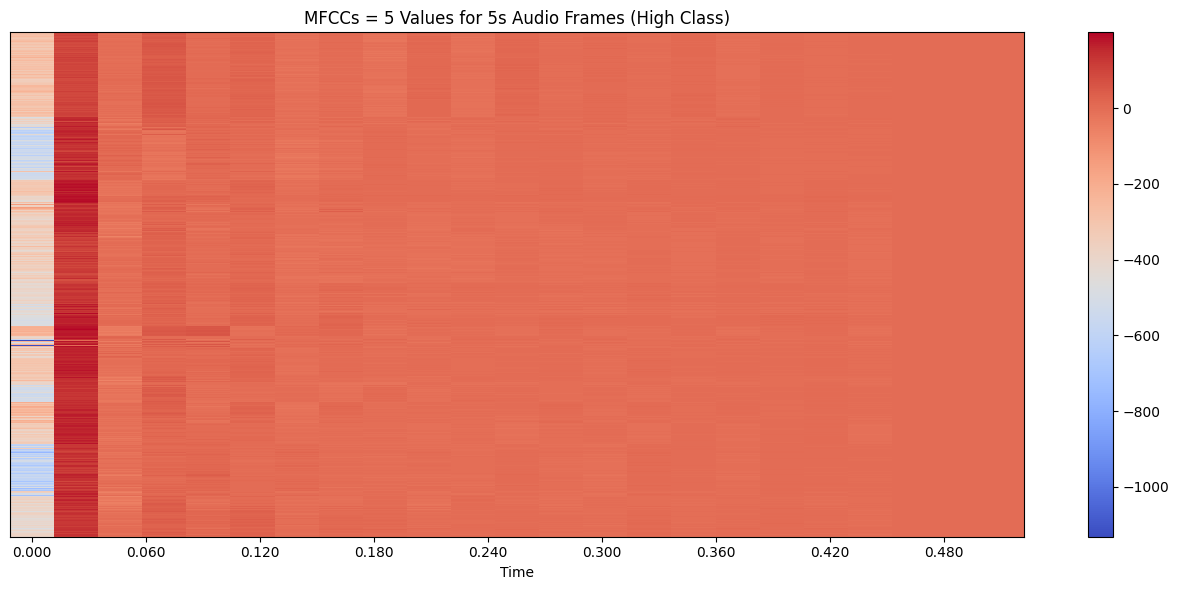

In [11]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(13, 6))
librosa.display.specshow(features, x_axis='time')
plt.colorbar()
plt.title('MFCCs = 5 Values for 5s Audio Frames (High Class)')
plt.tight_layout()
plt.savefig('test saving.png')
#Correct Interpretation of MFCC Spectrograms??: https://dsp.stackexchange.com/questions/38830/whats-the-correct-graphical-interpretation-of-a-series-of-mfcc-vectors

In [12]:
features.shape #1424 Frames (Segments), 5 MFCCs
len(features[1])

23

#### Plot of spectrograms using Librosa module
- Reference: https://librosa.github.io/librosa/generated/librosa.display.specshow.html

<ipython-input-13-9286b354c068>:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max) #Convert amplitude into db


Text(0.5, 1.0, 'Linear power spectrogram (grayscale)')

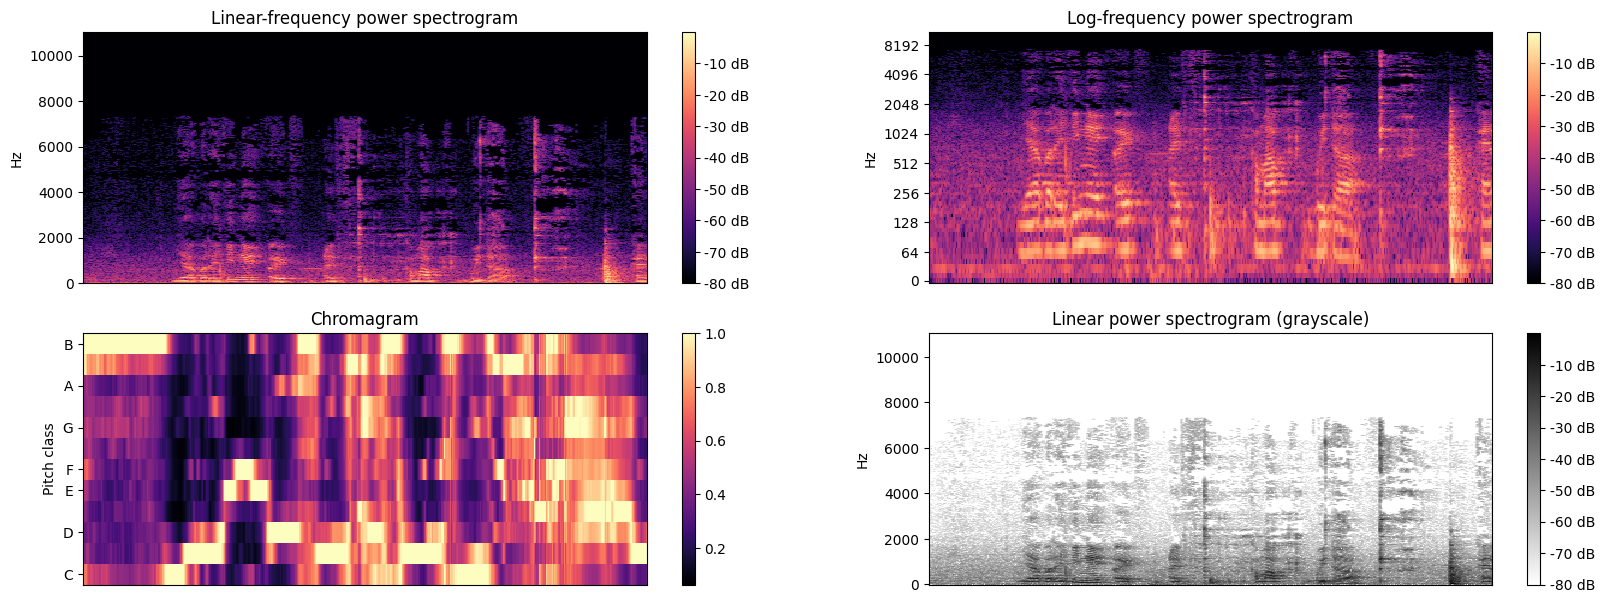

In [13]:
#Visualize an STFT power spectrum
import matplotlib.pyplot as plt
y , sr = librosa.load(r'/content/drive/MyDrive/audio files/003 - High/Avalinguo - Alan and Eduardo segment 100 - A.mp3', sr=None) # Using my own audio segment
#y, sr = librosa.load(librosa.util.example_audio_file())
plt.figure(figsize=(20, 15))
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max) #Convert amplitude into db
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear') #Linear Scale
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

# The above one on a logarithmic scale
plt.subplot(4, 2, 2)
#plt.figure(figsize=(20, 10))
librosa.display.specshow(D, y_axis='log') #Log scale
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

# Draw a chromagram with pitch classes
C = librosa.feature.chroma_cqt(y=y, sr=sr)
plt.subplot(4, 2, 3)
librosa.display.specshow(C, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')

#Force a grayscale colormap (white -> black)
plt.subplot(4, 2, 4)
librosa.display.specshow(D, cmap='gray_r', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear power spectrogram (grayscale)')

### Multilayer Perceptron (MLP) for multi-class softmax classification (Keras Tensorflow)

In [14]:
# coding= UTF-8
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

# Fix random seed number
np.random.seed(7)

# Load the data
X = np.load('feat.npy')
y = np.load('label.npy').ravel() #Return a contiguous flattened array.

number_of_features = len(X[1]) #This is variable with each run
number_of_classes = 3

# Sample data randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #70% Train, 30% Test

# Neural Network Architecture
mlp = Sequential() # Define Sequential model

# Using relu on the first two layers and softmax on the output layer

# 1st Layer
#N neurons, Number_Fatures-dimensional vectors
mlp.add(Dense(512, input_dim=number_of_features, activation='relu')) #32, 64, 128, 256, 512, 1024
mlp.add(Dropout(0.5))

# 2nd Layer
mlp.add(Dense(512, activation='relu'))
mlp.add(Dropout(0.5))

# 3rd Layer. Output 3 neurons corresponding the number of classes
# The sigmoid function is used for the two-class logistic regression,
# whereas the softmax function is used for the multiclass logistic regression
mlp.add(Dense(number_of_classes, activation='softmax'))

# Model Compilation. Loss for multi-class classification problem
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsprop = 'rmsprop'
adam = 'adam'
mlp.compile(loss='categorical_crossentropy',
              optimizer= rmsprop, #rmsprop better than sgd
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train-1, num_classes= number_of_classes) # Convert class vector into binary Matrix
y_test = keras.utils.to_categorical(y_test-1, num_classes= number_of_classes)

# Train and test
mlp.fit(X_train, y_train, epochs=300, batch_size=64) #batch 32, 64, 128, 256, 512
score, acc = mlp.evaluate(X_test, y_test, batch_size=64)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/300
16/16 [==============================] - 1s 15ms/step - loss: 35.0327 - accuracy: 0.3976
Epoch 2/300
16/16 [==============================] - 0s 12ms/step - loss: 13.5654 - accuracy: 0.4548
Epoch 3/300
16/16 [==============================] - 0s 14ms/step - loss: 8.7753 - accuracy: 0.4659
Epoch 4/300
16/16 [==============================] - 0s 13ms/step - loss: 4.6793 - accuracy: 0.5301
Epoch 5/300
16/16 [==============================] - 0s 10ms/step - loss: 2.9321 - accuracy: 0.5733
Epoch 6/300
16/16 [==============================] - 0s 10ms/step - loss: 2.0158 - accuracy: 0.6024
Epoch 7/300
16/16 [==============================] - 0s 10ms/step - loss: 1.3520 - accuracy: 0.6054
Epoch 8/300
16/16 [==============================] - 0s 9ms/step - loss: 1.1390 - accuracy: 0.6416
Epoch 9/300
16/16 [==============================] - 0s 9ms/step - loss: 1.0160 - accuracy: 0.6476
Epoch 10/300
16/16 [==============================] - 0s 10ms/step - loss: 0.8724 - accuracy: 0.6657

In [15]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.3455941081047058
Test accuracy: 0.9485981464385986


###Predict


In [16]:
audio_data_2d = audio_data_2d_predict('/content/drive/MyDrive/voice_clone/custom_voice.mp3')
audio_data_2d

array([[-2.38906097e+02,  1.60499985e+02, -3.02288170e+01,
         3.06105843e+01,  1.05861521e+01,  1.60789547e+01,
        -4.28822947e+00, -6.29201937e+00, -9.42904472e+00,
        -1.99512272e+01, -8.72492695e+00, -3.80123591e+00,
        -4.18181181e+00, -3.34228492e+00,  3.74720550e+00,
        -3.49714994e-01, -8.87856841e-01, -2.76956415e+00,
         1.61255336e+00,  4.38828230e+00,  9.69702303e-02,
         1.36584842e+00,  5.93902921e-02]])

In [17]:
mlp.predict(audio_data_2d)

1/1 [==============================] - 0s 93ms/step


array([[9.9999976e-01, 1.2172222e-07, 1.6466471e-07]], dtype=float32)


#### SVM Classification

- The C parammeter in SVM: https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel
- What are C and gamma in SVM? https://www.quora.com/What-are-C-and-gamma-with-regards-to-a-support-vector-machine

In [18]:
#Load data from generated numpy files
X = np.load('feat.npy') # list of features
y = np.load('label.npy').ravel() # labels are the target

In [19]:
# coding= UTF-8
import numpy as np
import sklearn
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

#Load data from generated numpy files
X = np.load('feat.npy') # list of features
y = np.load('label.npy').ravel() # labels are the target

# Fix random seed number
np.random.seed(7)

# Load the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
#Dr : 10 fold validation (9 train, 1 test), (8 train , 1 test, 1 train)
#Se entrena clasificador en un ciclo de 10 veces
#10 fold es parte de Sci-kit

# Data scaling (Do I need it?)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

# SVM classifier
svm_clf = SVC(C=200, gamma = 0.0001, kernel='rbf', decision_function_shape="ovr", probability = True)
#svm_clf = LinearSVC(random_state=42) # HandsOn git

# Fit model
svm_clf.fit(X_train, y_train) #From Beif github
#svm_clf.fit(X_train_scaled, y_train) # HandsOn book

# Predictions
y_predict = svm_clf.predict(X_test)

# Accuracy Result
acc = svm_clf.score(X_test, y_test) # From Beif github
print("Final accuracy = %0.4f" %acc)
#print('\n')
#print(classification_report(y_test, y_predict))

Final accuracy = 0.8972


In [20]:
# Audio parsing: Function makes call for feature extraction and returns array with features and labels
def audio_data_2d_predict(path, file_ext='*.mp3'): # Audio Format

    file_name = path

    n_mfccs = 20 # This variable is tunneable with each run
    number_of_features = 3 + n_mfccs
    #number_of_features = 154 + n_mfccs # 154 are the total values returned by rest of computed features
    features, labels = np.empty((0,number_of_features)), np.empty(0)

    ##Extract features for each audio file

    mfccs, rmse, spectral_flux, zcr = feature_extraction(file_name)

    extracted_features = np.hstack([mfccs, rmse, spectral_flux, zcr])
            #print "Total Extracted Features: ", len(extracted_features) #This helps us identify really how many features are being computed
    features = np.vstack([features, extracted_features]) #Stack arrays in sequence vertically (row wise).

    return np.array(features)

In [21]:
svm_clf.predict(audio_data_2d)

array([1])

In [ ]:

# View the predicted probabilities of the first n observations
svm_clf.predict_proba(X_test)[0:10] #IT IS NOT WORKING, CHECK LATER

##### Compute Confussion Matrix

In [23]:
# De-encoding predicted and actual classes (going from numeric to written)
prediction_decoded = label_classes[y_predict]
actual_value_decoded = label_classes[y_test]

In [24]:
## Confusion Matrix
# This is the unnormalized matrix ...
pd.crosstab(actual_value_decoded, prediction_decoded)
#pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

col_0,High,Intermediate,Low
row_0,,,
High,137,3,2
Intermediate,1,132,26
Low,1,11,115


#### Random Forest Classification (Sklearn)

- Tunning parameters of a RF: https://stackoverflow.com/questions/36107820/how-to-tune-parameters-in-random-forest-using-scikit-learn

In [25]:
from sklearn.ensemble import RandomForestClassifier #Random Forest classifier
import pandas as pd
import numpy as np
np.random.seed(7)


In [26]:
#Load data
X = np.load('feat.npy')
y = np.load('label.npy').ravel()


#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=6)

# Initialize classifier
rf_clf = RandomForestClassifier(n_estimators=350, n_jobs=2, random_state=6, max_features="auto")

# Train model
rf_clf.fit(X_train, y_train)

# Make predictions
y_prediction = rf_clf.predict(X_test)

# Evaluate accuracy
acc = rf_clf.score(X_test, y_test)
print("Accuracy = %0.5f" %acc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy = 0.91121


In [27]:
# View the predicted probabilities of the first n observations
rf_clf.predict_proba(X_test)[0:10]

array([[0.        , 0.        , 1.        ],
       [0.00285714, 0.00571429, 0.99142857],
       [0.78285714, 0.07714286, 0.14      ],
       [0.97142857, 0.00857143, 0.02      ],
       [0.01428571, 0.98285714, 0.00285714],
       [0.48571429, 0.48285714, 0.03142857],
       [0.00571429, 0.01428571, 0.98      ],
       [0.57142857, 0.31142857, 0.11714286],
       [0.08857143, 0.15428571, 0.75714286],
       [0.63714286, 0.31142857, 0.05142857]])

In [28]:
rf_clf.predict(audio_data_2d)

array([0])

##### Compute Confussion Matrix

In [29]:
# De-encoding predicted and actual classes (going from numeric to written)
prediction_decoded = label_classes[y_prediction]
actual_value_decoded = label_classes[y_test]

## Confusion Matrix
pd.crosstab(actual_value_decoded, prediction_decoded)

col_0,High,Intermediate,Low
row_0,,,
High,136,5,3
Intermediate,1,136,19
Low,1,9,118


#### CNN Classification (Keras Tensorflow)

In [30]:
# coding= UTF-8
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

# Load data
X = np.load("feat.npy")
y = np.load('label.npy').ravel()

# Fix random seed number
np.random.seed(7)

number_of_features = len(X[1])
number_of_classes = 3

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 233)

# Need to reshape you data to have a spatial dimension for Conv1d to make sense
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Neural Network Construction
cnn = Sequential()

# Neural Network Architecture
# Using 1D Convolutions (approriate for audio files)

# first layer has 64 convolution filters
cnn.add(Conv1D(64, 3, activation='relu', padding='same', input_shape = (number_of_features, 1)))
cnn.add(Conv1D(64, 3, activation='relu'))
cnn.add(MaxPooling1D(3))
cnn.add(Conv1D(32, 3, padding='same', activation='relu'))
cnn.add(Conv1D(32, 3, padding='same', activation='relu'))
cnn.add(GlobalAveragePooling1D())
cnn.add(Dropout(0.5))

cnn.add(Dense(number_of_classes, activation='softmax'))

cnn.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Convert label to onehot
y_train = keras.utils.to_categorical(y_train - 1, num_classes= number_of_classes) # Converts a class vector (integers) to binary class matrix
y_test = keras.utils.to_categorical(y_test - 1, num_classes= number_of_classes)

# Train Network
cnn.fit(X_train, y_train, batch_size=32, epochs=90)

# Evaluate model's accuracy with test data
score, acc = cnn.evaluate(X_test, y_test, batch_size=32) # Computes the loss & accuracy based on the input you pass it

print('Test score:', score) #loss
print('Test accuracy:', acc)

Epoch 1/90
32/32 [==============================] - 2s 12ms/step - loss: 1.2038 - accuracy: 0.4287
Epoch 2/90
32/32 [==============================] - 0s 13ms/step - loss: 0.9222 - accuracy: 0.5422
Epoch 3/90
32/32 [==============================] - 0s 11ms/step - loss: 0.7852 - accuracy: 0.6466
Epoch 4/90
32/32 [==============================] - 0s 7ms/step - loss: 0.6962 - accuracy: 0.6978
Epoch 5/90
32/32 [==============================] - 0s 7ms/step - loss: 0.6360 - accuracy: 0.7430
Epoch 6/90
32/32 [==============================] - 0s 8ms/step - loss: 0.5810 - accuracy: 0.7540
Epoch 7/90
32/32 [==============================] - 0s 7ms/step - loss: 0.5249 - accuracy: 0.7751
Epoch 8/90
32/32 [==============================] - 0s 8ms/step - loss: 0.4972 - accuracy: 0.7811
Epoch 9/90
32/32 [==============================] - 0s 8ms/step - loss: 0.5073 - accuracy: 0.7851
Epoch 10/90
32/32 [==============================] - 0s 7ms/step - loss: 0.4558 - accuracy: 0.8012
Epoch 11/90
32/3

In [31]:
cnn.predict(audio_data_2d)

1/1 [==============================] - 0s 121ms/step


array([[9.5025265e-01, 2.6911139e-05, 4.9720362e-02]], dtype=float32)

In [32]:
max(cnn.predict(audio_data_2d)[0])*100

1/1 [==============================] - 0s 28ms/step


95.02526521682739

#### RNN Classification (Keras Tensorflow)

- Sigmoid vs Softmax: The sigmoid function is used for the two-class logistic regression (0 or 1, speech or non-speech), whereas the softmax function is used for the multiclass logistic regression (a.k.a. MaxEnt, multinomial logistic regression, softmax Regression, Maximum Entropy Classifier). (dog bark, sea waves, ...)
- Network Architecture: Regarding more general choices, there is rarely a "right" way to construct the architecture. Instead that should be something you test with different meta-params (such as layer sizes, number of layers, amount of drop-out), and should be results-driven (including any limits you might have on resource use for training time/memory use etc).
- https://datascience.stackexchange.com/questions/10048/what-is-the-best-keras-model-for-multi-class-classification

In [33]:
# coding= UTF-8
import os
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.optimizers import Adam

# Load data
X = np.load("feat.npy")
y = np.load('label.npy').ravel()

# Fix random seed number
np.random.seed(7)

number_of_features = len(X[1])
number_of_classes = 3

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 230)


# Reshape data for LSTM (Samples, Timesteps, Features)
X_train = np.expand_dims(X_train, axis=2) #(280,193,1)
X_test = np.expand_dims(X_test, axis=2)

y_train = keras.utils.to_categorical(y_train - 1, num_classes= number_of_classes) # Converts a class vector (integers) to binary class matrix
y_test = keras.utils.to_categorical(y_test - 1, num_classes= number_of_classes)

# Build RNN Neural Network
print('Build LSTM RNN model ...')
rnn = Sequential()
rnn.add(LSTM(256, return_sequences=True, input_shape=X_train.shape[1:]))
rnn.add(LSTM(32, return_sequences=False))

#model.add(LSTM(16, return_sequences=False))
rnn.add(Dense(number_of_classes, activation='softmax'))

print("Compiling ...")
rnn.compile(loss='categorical_crossentropy', # for multiple classes
              optimizer='rmsprop',
              metrics=['accuracy'])

print(rnn.summary())

print("Training ...")
rnn.fit(X_train, y_train, batch_size=64, epochs=60)

print("\nValidating ...")
score, accuracy = rnn.evaluate(X_test, y_test, batch_size=32, verbose=1)
print("Loss:  ", score)
print("Accuracy:  ", accuracy)

Build LSTM RNN model ...
Compiling ...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 23, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 32)                36992     
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 301,283
Trainable params: 301,283
Non-trainable params: 0
_________________________________________________________________
None
Training ...
Epoch 1/60
16/16 [==============================] - 7s 120ms/step - loss: 1.0071 - accuracy: 0.5161
Epoch 2/60
16/16 [==============================] - 2s 112ms/step - loss: 0.8594 - accuracy: 0.6145
Epoch 3/60
16/16 [==============================] - 2s 

In [34]:
audio_data_2d = audio_data_2d_predict('/content/drive/MyDrive/voice_clone/custom_voice.mp3')
audio_data_2d

array([[-2.38906097e+02,  1.60499985e+02, -3.02288170e+01,
         3.06105843e+01,  1.05861521e+01,  1.60789547e+01,
        -4.28822947e+00, -6.29201937e+00, -9.42904472e+00,
        -1.99512272e+01, -8.72492695e+00, -3.80123591e+00,
        -4.18181181e+00, -3.34228492e+00,  3.74720550e+00,
        -3.49714994e-01, -8.87856841e-01, -2.76956415e+00,
         1.61255336e+00,  4.38828230e+00,  9.69702303e-02,
         1.36584842e+00,  5.93902921e-02]])

In [37]:
rnn.predict(audio_data_2d)

1/1 [==============================] - 0s 135ms/step


array([[0.59123987, 0.27951238, 0.12924767]], dtype=float32)